In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/voice.csv')
data.shape

(3168, 21)

In [6]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
data.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [8]:
data['label'].value_counts()

,count
label,
male,1584
female,1584


In [10]:
x = data.drop(['label'],axis =1 )
y = data['label']

y = y.map({'male':1, 'female':0})

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

print('Training data  shape: ',x_train.shape, y_train.shape)
print('Testing data shape: ',x_test.shape, y_test.shape)

Training data  shape:  (2534, 20) (2534,)
Testing data shape:  (634, 20) (634,)


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [13]:
# Training the svc with default parameters
svc_default = SVC()
svc_default.fit(x_train_scaled,y_train)
print('Default Parameter Training score: ',round(svc_default.score(x_train_scaled, y_train)*100,2),'%')

Default Parameter Training score:  98.58 %


In [14]:
y_pred = svc_default.predict(x_test_scaled)

print('Default Parameter testing score: ',round(accuracy_score(y_test,y_pred)*100,2),'%')

Default Parameter testing score:  98.26 %


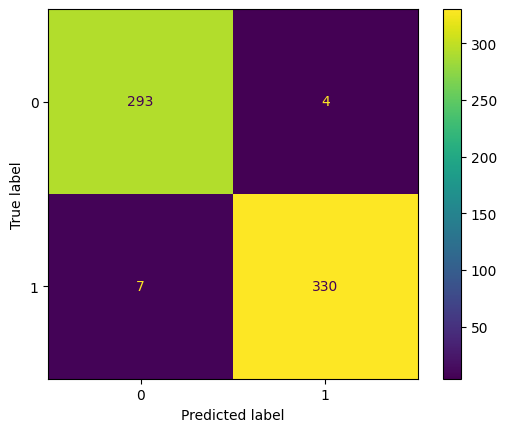

In [15]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Hyper Parameter Tuning

In [16]:
estimator = SVC(random_state = 42)
param_grid = {'kernel':['linear','rbf','poly'],
              'C': np.arange(0,10,0.5),
              'gamma': np.arange(0,5,0.5)}


grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = 5, scoring = 'accuracy',n_jobs = -1,verbose = 3)
grid_search.fit(x_train_scaled, y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
{'C': 1.0, 'gamma': 0.0, 'kernel': 'linear'}


In [17]:
# Creating model with best parameters
final_model = SVC(**best_parameters,random_state = 42)
final_model.fit(x_train_scaled, y_train)
print('Final Training score: ', round(final_model.score(x_train_scaled,y_train)*100,2),'%')


Final Training score:  97.71 %


In [18]:
y_pred = final_model.predict(x_test_scaled)
print('final Testing score: ',round(accuracy_score(y_test,y_pred)*100,2),'%')


final Testing score:  97.63 %


Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



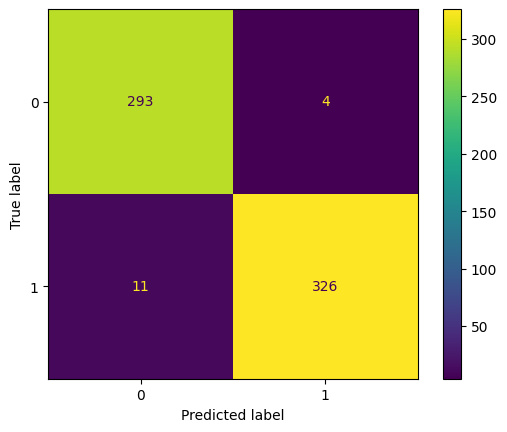

In [19]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

report = classification_report(y_test,y_pred)
print('Classification Report: \n\n',report)